<a href="https://github.com/Dummy-Bug/Quora-Question-Pairs/blob/master/Data%20Cleaning/Feature%20Extraction%20and%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'> Exploratory Data Analysis</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
path = '/content/drive/MyDrive/Quora/train.csv'

df = pd.read_csv(path)

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.shape

(404290, 6)

In [7]:
df.info() # some values are missing from the 'question2' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.question2.isnull().sum() # since very few values are missing from this column hence it's better to remove both the rows.

2

**let's see if the classes are balanced or not**

In [9]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

Dataset is not balanced

**https://stackoverflow.com/questions/26476668/frequency-plot-in-python-pandas-dataframe**

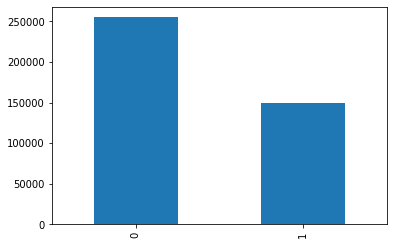

In [10]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots() # plt.subplots() is a function that returns a tuple containing a figure and axes object(s).

df['is_duplicate'].value_counts().plot(ax=ax, kind='bar')

plt.show()

**https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python**

In [11]:
df.groupby("is_duplicate").count() 
# It will select all the columns present inside df and then it will group accoridng to 'is_duplicate'

,id,qid1,qid2,question1,question2
is_duplicate,,,,,
0,255027,255027,255027,255026,255025
1,149263,149263,149263,149263,149263


In [12]:
df[['id','is_duplicate']].groupby(['is_duplicate']).count()
# This will first select two columns from df and then will group them according to 'is_duplicate' .

,id
is_duplicate,
0,255027
1,149263


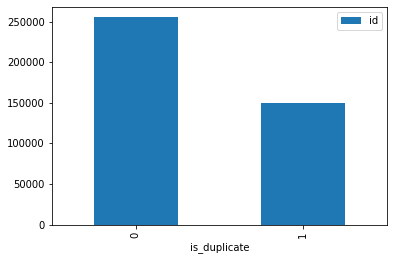

In [13]:
df[['id','is_duplicate']].groupby(['is_duplicate']).count().plot(kind = 'bar') 

plt.show()
# This will first select two columns from df and then will group them according to 'is_duplicate' and then it will plot

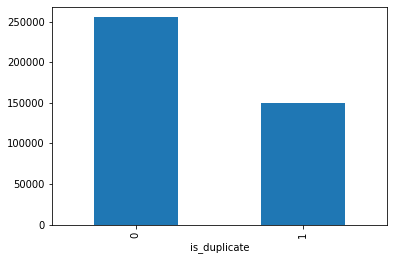

In [14]:
df.groupby("is_duplicate")['id'].count().plot(kind = 'bar')

plt.show()
# selecting all columns from df then grouping them according to 'is_duplicate' and then accordingly counting the 'id' column
# as 'id' would be unique of every pair

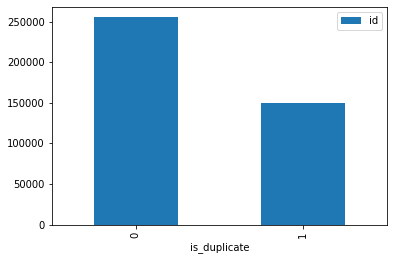

In [15]:
df[['id','is_duplicate']].groupby('is_duplicate').count().plot.bar()

plt.show()
# selecting the column that are required to plot
# remeber we need numeric data to plot
# df[[is_duplicate']].groupby('is_duplicate').count().plot.bar() , will result in an error

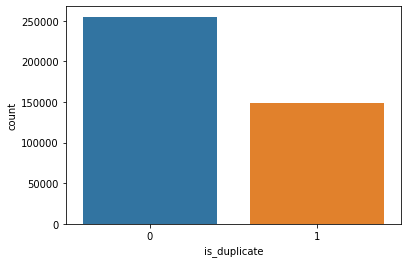

In [16]:
import seaborn as sns

sns.countplot(x = 'is_duplicate',data = df) # This is much simpler and elgant.
plt.show()

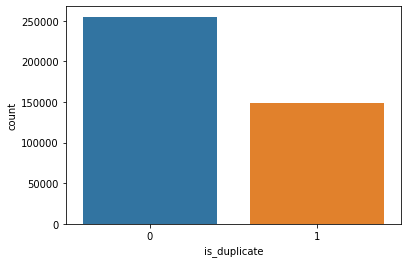

In [17]:
sns.countplot(x = df.is_duplicate) # another way since we want to plot only one column so why to feed the whole data

plt.show()

In [18]:
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)) )
# we can use for loop too
print('\n~> Question pairs are Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
# just subtract from 100 to get the percentage of other class


~> Question pairs are Similar (is_duplicate = 1):
   36.92%

~> Question pairs are Similar (is_duplicate = 0):
   63.08%


**Number of Unique Questions**

In [19]:
import numpy as np

qids = pd.Series( df['qid1'].tolist() + df['qid2'].tolist() )
unique_questions = len(qids.unique())
print("Total Number of Unique Questions {}".format(unique_questions))

repeated_questions = np.sum(qids.value_counts()>1) # value_counts gives the count of every category
print("Total Number of Repeated Questions are {}({})%\n".format(repeated_questions,repeated_questions/unique_questions*100))

q_vals = qids.value_counts() # contains frequncy of every question
print("Maximum Number of times one question is repeated is {}\n".format(max(q_vals)) )


# print(type(q_vals),q_vals.shape) # two columns one containing category other containing it's occurence
# print(q_vals)
# q_vals = q_vals.values # Return Series as ndarray or ndarray-like depending on the dtype
# print(q_vals)

Total Number of Unique Questions 537933
Total Number of Repeated Questions are 111780(20.77953945937505)%

Maximum Number of times one question is repeated is 157



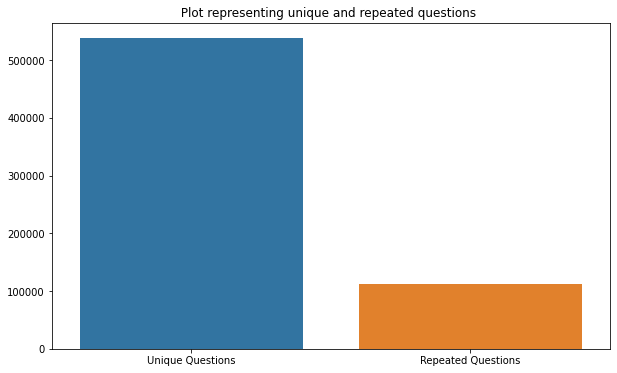

In [20]:
x_axis = ['Unique Questions','Repeated Questions']
y_axis = [unique_questions,repeated_questions]

plt.figure(figsize=(10,6))
sns.barplot(x = x_axis,y= y_axis)

plt.title (" Plot representing unique and repeated questions  ")

plt.show()

## Checking for Duplicates

In [21]:
pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()
print(pair_duplicates.head())
print(df.shape,pair_duplicates.shape)
print("Number of Duplicate Question Pairs are :- ",df.shape[0] - pair_duplicates.shape[0]) # Finding the Difference in number of rows

             is_duplicate
qid1 qid2                
1    2                  1
3    4                  1
     282170             1
     380197             1
     488853             1
(404290, 6) (404290, 1)
Number of Duplicate Question Pairs are :-  0


In [22]:
pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print(pair_duplicates.head())
print("Number of Duplicate Questions are :- ",df.shape[0] - pair_duplicates.shape[0])

   qid1    qid2  is_duplicate
0     1       2             1
1     3       4             1
2     3  282170             1
3     3  380197             1
4     3  488853             1
Number of Duplicate Questions are :-  0


## Number of occurrences of each Question

Maximum number of times a single question is repeated: 157



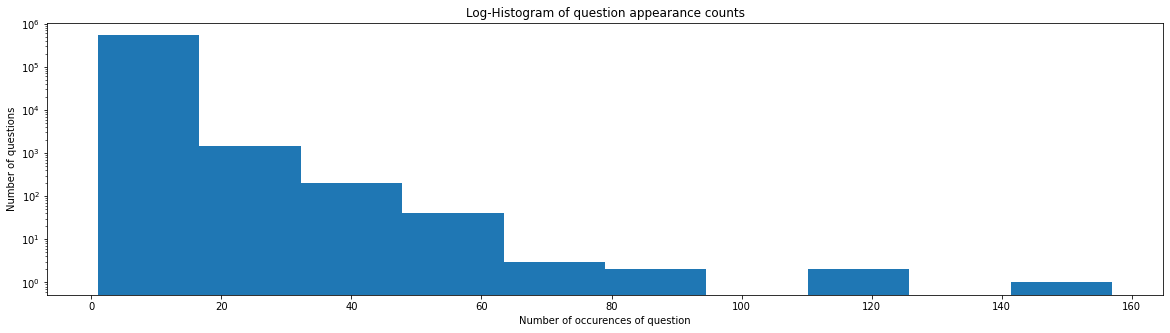

In [23]:
plt.figure(figsize = (20,5))
plt.hist(qids.value_counts()) # If bins is an integer, it defines the number of equal-width bins in the range.by def 10 bins

plt.yscale("log")# setting the y-axis scale to log

plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

Maximum number of times a single Question is repeated: 157



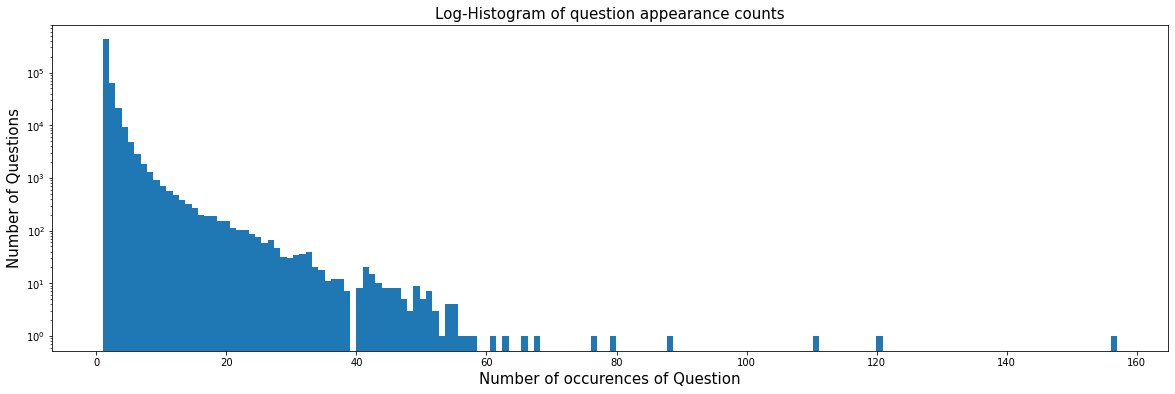

In [24]:
plt.figure(figsize = (20,6))

plt.hist(qids.value_counts(),bins = 160) # 160 bins of equal width 

plt.yscale("log")# Any nonpositive value will be clipped to a number very close to 0 or 1

plt.title('Log-Histogram of question appearance counts',fontsize = 15)
plt.xlabel('Number of occurences of Question',fontsize = 15)
plt.ylabel('Number of Questions',fontsize = 15)

print ('Maximum number of times a single Question is repeated: {}\n'.format(max(qids.value_counts()))) 

## Checking for Null Values

In [25]:
number_of_nan_rows = df.isnull().any(axis = 1).sum()# will check whole row if any column value is Null then it will return 1, then take sum of
                                                                                                      # of all ones.
print (number_of_nan_rows)

3


In [26]:
nan_row_df = df[df.isnull().any(axis = 1)] # will check whole row if any column value is Null then it will return 1, then take sum of
                                                                                    # that whole row and copy it on lhs variable.

nan_row_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [27]:
# Filling the null values with ' '

df = df.fillna('')
nan_rows = df[df.isnull().any(1)] 
#  when the text column is missing, we have to drop those rows.but here we are just filling because only two rows are missing.
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


## <h2> Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - **freq_qid1** = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1 (string length)
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [28]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


**https://pbpython.com/pandas_transform.html**

In [29]:
df.groupby('qid1')['qid1'].sum() # it will sum the column on the basis of 'qid1'

# e.g "qid1 = 3" is repeated 4 times and hence it has value of 12 , similary 'qid1 = 4' is present only one time and hence sum is 4 only,
# but this is not what we want , we want the frequency of the question,i,e how many times a particular question id is repeated

qid1
1              1
3             12
4              4
5              5
7              7
           ...  
537924    537924
537926    537926
537928    537928
537930    537930
537932    537932
Name: qid1, Length: 290654, dtype: int64

In [30]:
df.groupby('qid1')['qid1'].count() # This is the right choice of function but if we use this without using the transform function then ,
# we will have to create a new dataframe bcz number of rows will become less after applying groupby() operation . 
# but we want to make changes in our original datafram only .i.e inplace changes hence we will use transform so that it combines the rows 
# after appyling the count function

qid1
1         1
3         4
4         1
5         1
7         1
         ..
537924    1
537926    1
537928    1
537930    1
537932    1
Name: qid1, Length: 290654, dtype: int64

In [31]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') # where count is the function that would be applied to each group.
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count') 

print(df[['freq_qid1','freq_qid2']]) #  here 0th column  is Index of original data Frame

        freq_qid1  freq_qid2
0               1          1
1               4          1
2               1          1
3               1          1
4               3          1
...           ...        ...
404285          2          2
404286         12          1
404287          1          1
404288          1          1
404289          1          1

[404290 rows x 2 columns]


In [32]:
df['q1len'] = df['question1'].str.len() # length of the questions 
df['q2len'] = df['question2'].str.len()

**https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html**

In [33]:
df['q1_n_words'] = df['question1'].apply(lambda row : len(row.split(" ")) ) # finding the number of words in a question
df['q2_n_words'] = df['question2'].apply(lambda row : len(row.split(" ")) )

In [34]:
df[['question1','q1len','freq_qid1','question2','q2len','freq_qid2']].head()

,question1,q1len,freq_qid1,question2,q2len,freq_qid2
0,What is the step by step guide to invest in sh...,66,1,What is the step by step guide to invest in sh...,57,1
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,51,4,What would happen if the Indian government sto...,88,1
2,How can I increase the speed of my internet co...,73,1,How can Internet speed be increased by hacking...,59,1
3,Why am I mentally very lonely? How can I solve...,50,1,Find the remainder when [math]23^{24}[/math] i...,65,1
4,"Which one dissolve in water quikly sugar, salt...",76,3,Which fish would survive in salt water?,39,1


In [35]:
def normalized_word_Common(row):
    
    set1 = set( map ( lambda word : word.lower().strip() , row['question1'].split(" ") ))
    set2 = set( map ( lambda word : word.lower().strip() , row['question2'].split(" ") ))
    
#     print(len(set1 and set2 ))
#     print(len(set1  &  set2 ))        
#     print(len(set1.intersection(set2)))
    
    return 1.0 * len(set1.intersection(set2))

df['word_Common'] = df.apply(normalized_word_Common,axis = 1) # applying function along column

In [36]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0


In [37]:
def normalized_word_Total(row):
    
    set1 = set( map(lambda word : word.lower().strip(), row['question1'].split(" ")))
    set2 = set( map(lambda word : word.lower().strip(), row['question2'].split(" ")))
    
    return 1.0 * ( len(set1) + len(set2) )

df['word_Total'] = df.apply(normalized_word_Total,axis = 1)

In [38]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0


In [39]:
def normalized_word_share(row):
    
    set1 = set( map(lambda word : word.lower().strip(), row['question1'].split() ))
    set2 = set( map(lambda word : word.lower().strip(), row['question2'].split() ))
    
    return 1.0 *  ( len(set1 & set2) )/( len(set1) + len(set2) )  

df['word_share'] = df.apply(normalized_word_share,axis = 1)

In [40]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000


In [41]:
df['freq_q1+q2'] =      df['freq_qid1'] + df['freq_qid2']
df['freq_q1-q2'] = abs( df['freq_qid1'] - df['freq_qid2'] )
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


##  3.3.1 Analysis of some of the extracted features 

In [42]:
print(" Minimum Length of the Questions in question1 :- ", min(df['q1_n_words']) )
print(" Minimum Length of the Questions in question2 :- ", min(df['q2_n_words']) )

In [43]:
print(" Maximum Length of the Questions in question1 :- ", max(df['q1_n_words']) )
print(" Maximum Length of the Questions in question2 :- ", max(df['q2_n_words']) )

 Maximum Length of the Questions in question1 :-  125
 Maximum Length of the Questions in question2 :-  237


In [ ]:
# let's check how many such questions are there 

print("Number of Questions with Minimum Length [question1] :- ", df[df['q1_n_words'] == 1].shape[0] ) # can also be done with apply method.
print("Number of Questions with Minimum Length [question2] :- ", sum(df['q2_n_words'].apply(lambda x: True if x == 1 else False)) )

Number of Questions with Minimum Length [question1] :-  67
Number of Questions with Minimum Length [question2] :-  24


## Feature Selection 

<h4> Feature: word_share </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='word_share'>

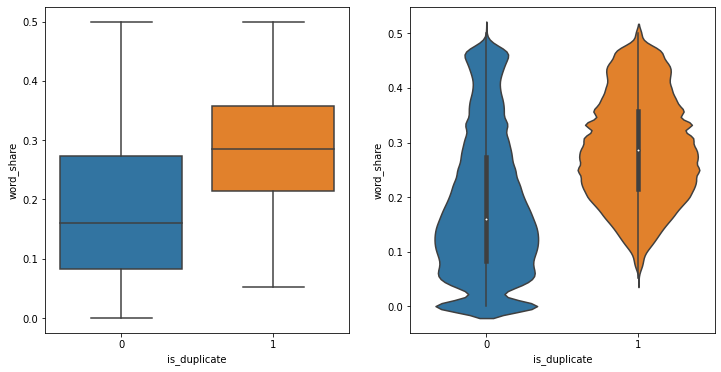

In [ ]:
plt.figure( figsize = (12,6) )

plt.subplot(1,2,1) # Divide figure in 1*2 number of subplots with 1 row and 2 columns (1,2,1) means 1 row 2 column 
sns.boxplot(x = 'is_duplicate',y = 'word_share',data = df)                           # and figure to be plotted in firsr cell.


plt.subplot(1,2,2) # figure would be plotted in 2nd cell
sns.violinplot(x = 'is_duplicate',y = 'word_share',data = df)

The boxes in Box-Plot are not overlapping perfectly.Hence Indication of words_share beaing a good feature

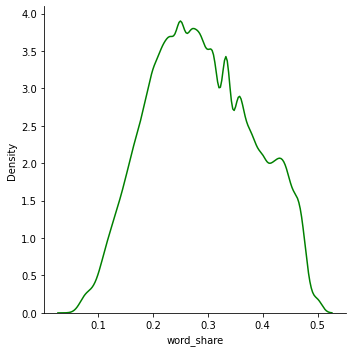

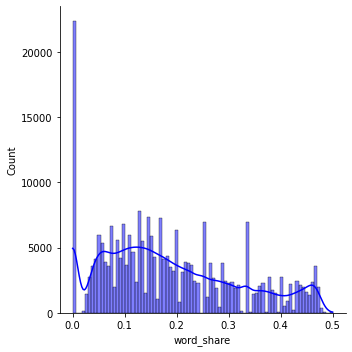

In [44]:
sns.displot(df[df['is_duplicate'] == 1.0] , x = 'word_share',color = 'green',kind  = 'kde') 
sns.displot(df[df['is_duplicate'] == 0.0] , x = 'word_share',color = 'blue', kde = True) # it's tough to distinguish both using this plot

plt.show()

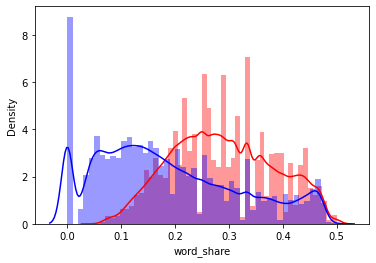

In [47]:
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'], color = 'red' ) # get me the word_share wherever is_duplicate == 1
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'], color = 'blue')

plt.show()
# we know lesser the overlap between the features better it is to distinguih them.
# in worst case overlap would be high and in best case overlap would be very very low

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> Feature:- word_Common </h4>

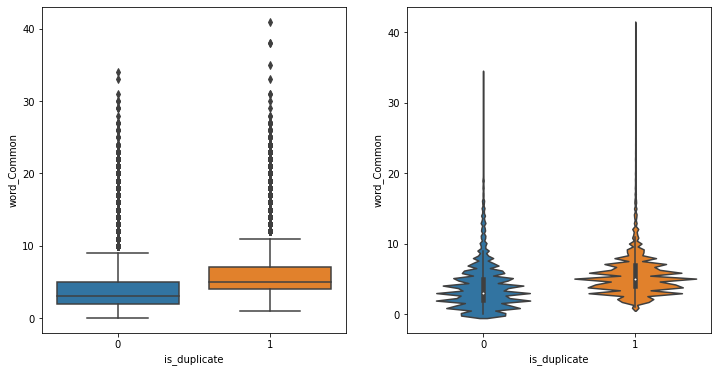

In [48]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate',y = 'word_Common',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'word_Common',data = df)

The boxes in Box-plot are more overlaping than boxes in Box-plot of feature word_Common.

compare the Violin plots of both word_share and word_Common, we see it's harder to separate classes (0/1) using feature word_common due to
high overlap.

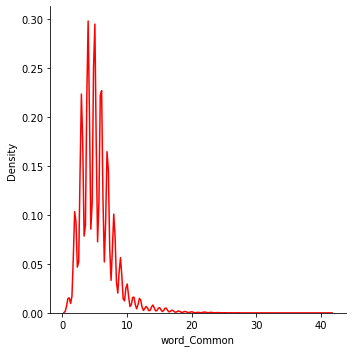

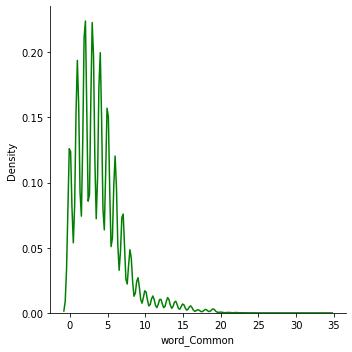

In [49]:
sns.displot(df[df['is_duplicate'] == 1.0], x = 'word_Common',kind = 'kde',color = 'red')
sns.displot(df[df['is_duplicate'] == 0.0], x = 'word_Common',kind = 'kde',color = 'green')

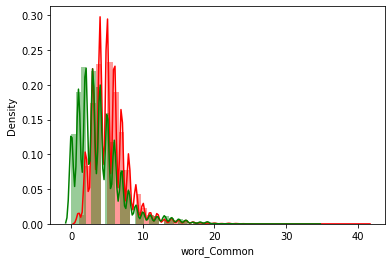

In [50]:
sns.distplot(df[ df['is_duplicate'] == 1.0 ]['word_Common'],color = 'red')
sns.distplot(df[ df['is_duplicate'] == 0.0 ]['word_Common'],color = 'green')

The distributions of the word_Common feature in similar and non-similar questions are highly overlapping.

<h4> Feature :- freq_qid1 </h4>

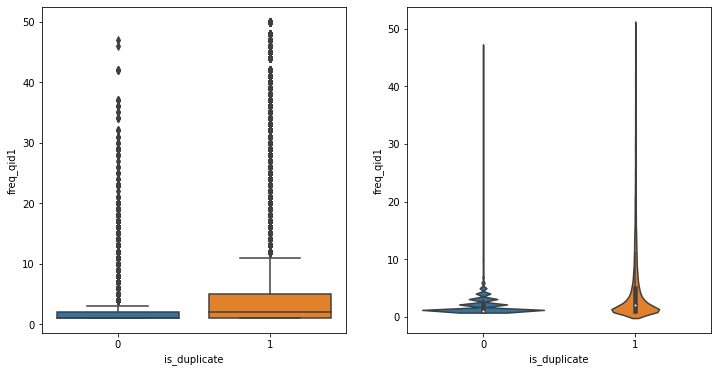

In [51]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate',y = 'freq_qid1',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_qid1',data = df)

 Too much overlap :-  Poor Feature

<h4> Feature :- freq_qid2 </h4>

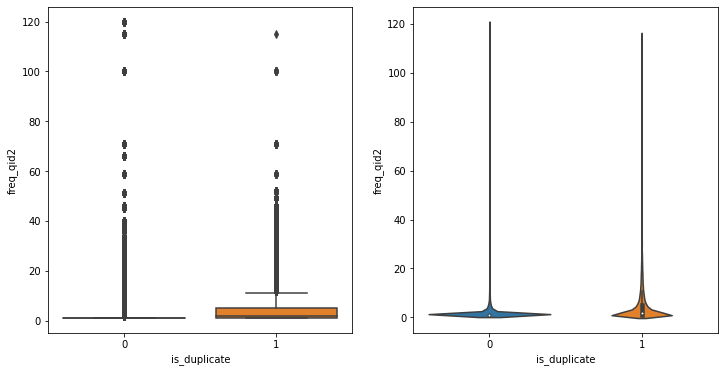

In [52]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate',y = 'freq_qid2',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_qid2',data = df)

Too much overlap :-  Poor Feature

<h4> Feature :- q1len </h4>

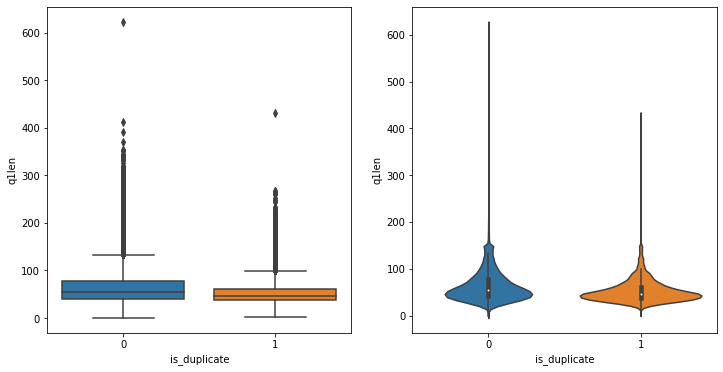

In [53]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1len',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q1len',data = df)

<h4> Feature :- q2len2 </h4>

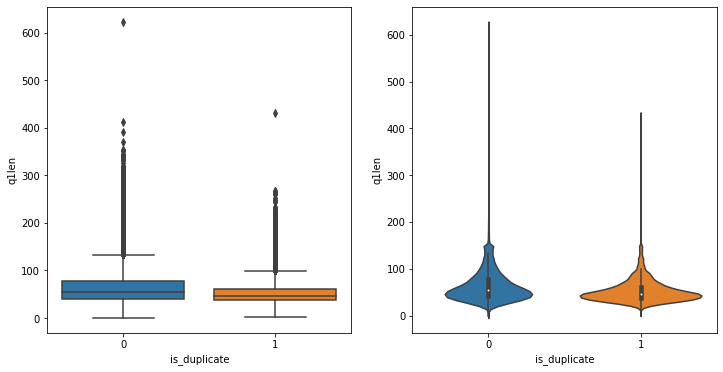

In [54]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1len',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q1len',data = df)

Too much overlap :- poor feature

<h4> Feature :- q1_n_words

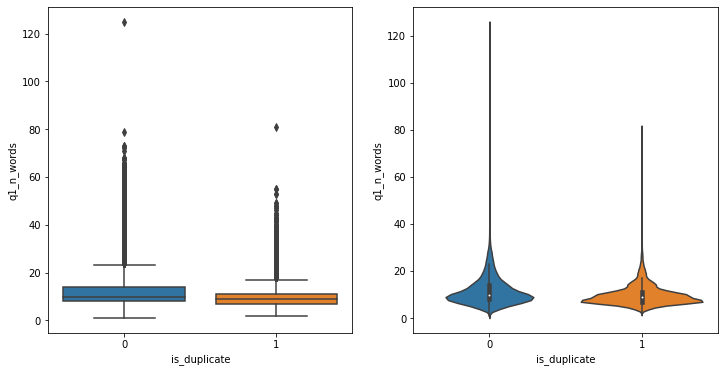

In [55]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1_n_words',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q1_n_words',data = df)

Too much overlap :- Discard the feature

<h4> Feature :- q2_n_words </h4>

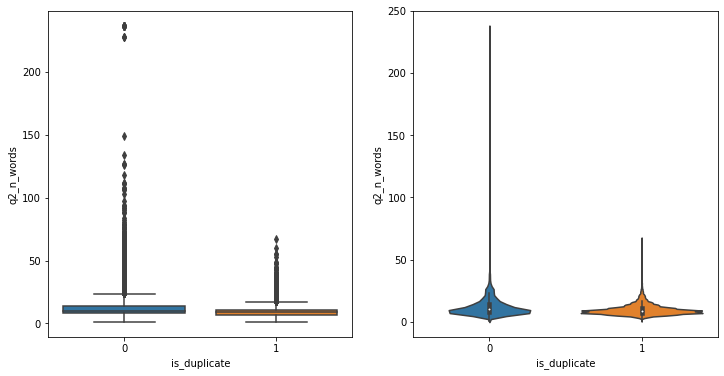

In [56]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q2_n_words',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q2_n_words',data = df)

Too much overlap :- Discard the feature

<h4> Feature :- word_Total </h4>

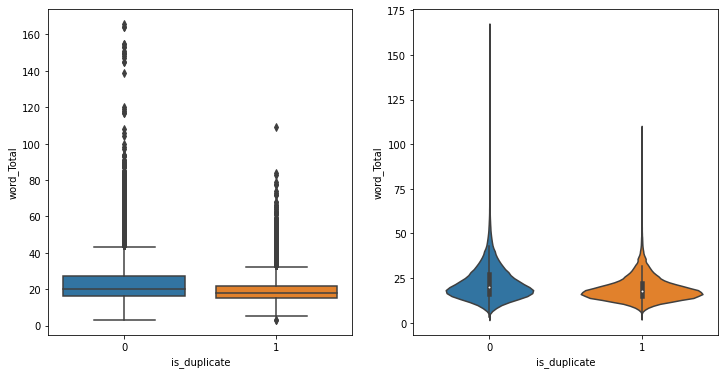

In [57]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_Total',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'word_Total',data = df)

Too much overlap :- Discard the feature

<h4> Feature :- freq_q1+q2 </h4>

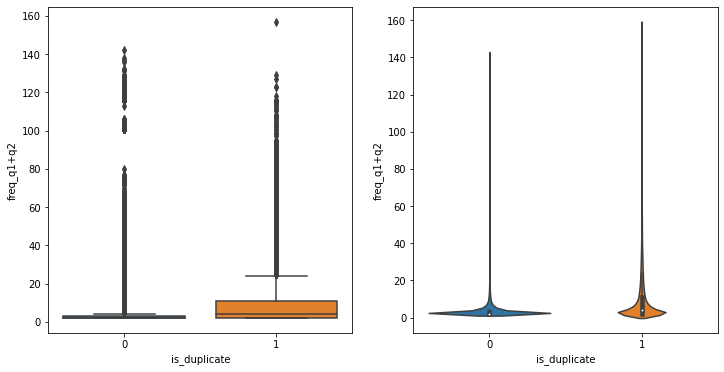

In [58]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'freq_q1+q2',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_q1+q2',data = df)

Too much overlaping :- Discard the feature

<h4> Feature :- freq_q1-q2 </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='freq_q1-q2'>

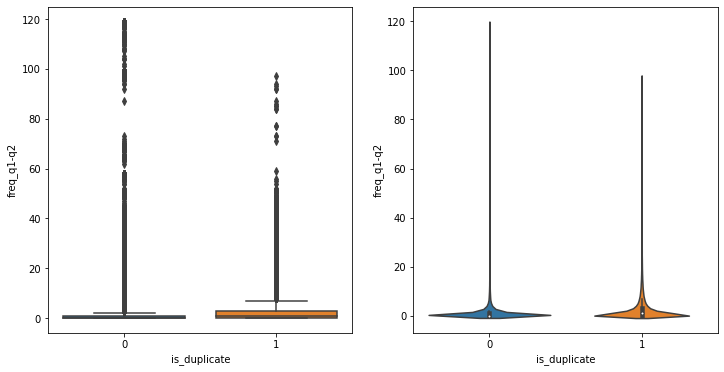

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'freq_q1-q2',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_q1-q2',data = df)

Too much overlap :- Discard the feature

<h4> word_share is the only useful feature from our designed features </h4>